0. Importing Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


1. Loading the data

In [2]:
# Loading the data of character metadata

df_characters = pd.read_csv('Data/character.metadata.tsv', sep='\t')
df_characters.columns = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date', 'Character name', 'Actor date of birth', 'Actor gender',
                        'Actor height (in meters)', 'Actor ethnicity (Freebase ID)', 'Actor name', 'Actor age at movie release',
                        'Freebase character/actor map ID', 'Freebase character ID', 'Freebase actor ID']

In [3]:
# Loading the data of movie metadata

df_movie = pd.read_csv('Data/movie.metadata.tsv', sep='\t')
df_movie.columns = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime',
                    'Movie languages (Freebase ID)', 'Movie countries (Freebase ID)', 'Movie genres (Freebase ID)']

In [4]:
# Loading name clusters
# 970 unique character names used in at least two different movies, along with 2,666 instances of those types

df_name_clusters = pd.read_csv('Data/name.clusters.txt', sep='\t')
df_name_clusters.columns = ['Character name', 'Freebase character/actor map ID']
print(len(df_characters))

450668


In [5]:
# Loading plot summaries
df_plot_summaries = pd.read_csv('Data/plot_summaries.txt', sep='\t')
df_plot_summaries.columns = ['Wikipedia movie ID', 'Plot Summary']
print(len(df_movie))

81740


2. Data Exploration

In [170]:
df_characters

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450663,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450664,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450665,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450666,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [169]:
# Checking when either character name or Freebase movie ID are missing:
print('Missing "character names" in character metadata: %d' %df_characters['Character name'].isnull().sum())
print('Missing "Freebase character" IDs in character metadata: %d' %df_characters['Freebase character ID'].isnull().sum())
print('We can see that the number of missing character names ≈ missing Freebase character IDs')
print('There are 10 characters where we have a "Freebase character ID" but not "character names"')

# Checking when both "Character name" and "Freebase character ID are missing":
df_characters.loc[df_characters['Character name'].isnull() & df_characters['Freebase movie ID'].isnull()]
out = df_characters.iloc[:, [3, 11]].isnull().all(1)
out
true_count = sum(out)
print('Missing Character name AND Freebase character ID: %d' %true_count)

# We could try and recover the character names by their Freebase movie IDs.

#df_characters.loc[df_characters['Character name'].isnull() & df_characters['Freebase actor ID'].notnull() & df_characters['Freebase character ID'].notnull()]


#df_characters.loc[df_characters['Wikipedia movie ID'].isnull() & df_characters['Freebase movie ID'].notnull()].count()
df_characters.iloc[:, [3, 11]].isnull().all(1)

Missing "character names" in character metadata: 257875
Missing "Freebase character" IDs in character metadata: 257865
We can see that the number of missing character names ≈ missing Freebase character IDs
There are 10 characters where we have a "Freebase character ID" but not "character names"
Missing Character name AND Freebase character ID: 257865


0         False
1         False
2         False
3         False
4         False
          ...  
450663    False
450664    False
450665     True
450666     True
450667     True
Length: 450668, dtype: bool

In [7]:
# Merging character with movie metadata with an inner join

df_char_movie = pd.merge(left=df_characters, right=df_movie, how='inner', on= ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date'])
print('The total number of characters that we obtain from the inner merge is: %d' %len(df_char_movie))
print('By merging character and movie metadata we are missing')

The total number of characters that we obtain from the inner merge is: 450652
By merging character and movie metadata we are missing


We do an inner join because there are movies in the movie metadata for which we do not have any character information in character metadata
and vice versa.

In [8]:
movies_with_characters = df_char_movie.groupby(['Wikipedia movie ID']).agg('size')
print('The resulting number of movies from the merge of characters and movies is: %d'%len(movies_with_characters))

The resulting number of movies from the merge of characters and movies is: 64329


In [110]:
# Computing the total number of characters and the number of character names we have in our dataframe
char_names_per_movie = df_char_movie.groupby('Wikipedia movie ID')['Character name'].count() # extracts number of characters we have (i.e. not coun ting NaNs)
total_characters_per_movie = df_char_movie.groupby(['Wikipedia movie ID'])['Character name'].agg(['size'])

In [145]:
df_character_missing_stats = pd.merge(total_characters_per_movie, char_names_per_movie, on='Wikipedia movie ID')

df_character_missing_stats['n°_missing_characters'] = df_character_missing_stats['size'] - df_character_missing_stats['Character name']
df_character_missing_stats['percentage_missing'] = round(100 * df_character_missing_stats['n°_missing_characters'] / df_character_missing_stats['size'], 2) # computing percentages of missing character names
df_character_missing_stats['percentage_available'] = 100 - df_character_missing_stats['percentage_missing']
df_character_missing_stats = df_character_missing_stats.rename(columns={'size': 'total_n°_characters (incl. NaN)'})
df_character_missing_stats = df_character_missing_stats.rename(columns={'Character name': 'character_names (excl. NaN)'})
df_character_missing_stats.head()

,total_n°_characters (incl. NaN),character_names (excl. NaN),n°_missing_characters,percentage_missing,percentage_available
Wikipedia movie ID,,,,,
330,4,0,4,100.0,0.0
3217,14,14,0,0.0,100.0
3333,14,0,14,100.0,0.0
3746,15,15,0,0.0,100.0
3837,20,16,4,20.0,80.0


In the dataframe above we obtain:
- the total amount of characters in a specific movie
- the number of character names for a specific movie
- the percentage of the character names that are missing per movie
- the percentage of the character names that are available per movie

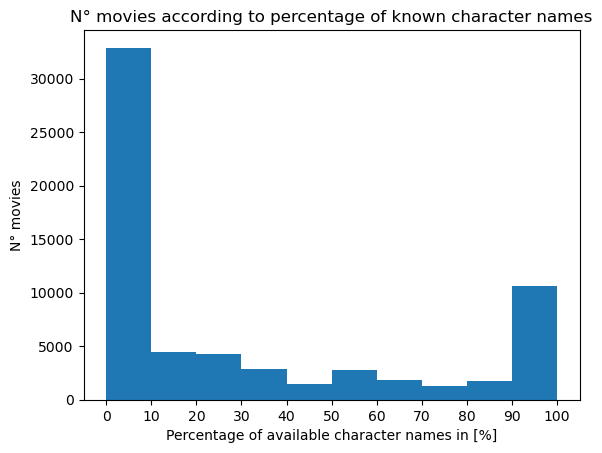

In [160]:
df_character_missing_stats['percentage_available'].hist(bins=10, grid=False)
plt.xticks(np.arange(0, 110, step=10))
plt.ylabel('N° movies')
plt.xlabel('Percentage of available character names in [%]')
plt.title('N° movies according to percentage of known character names')
plt.show()

For example: there are roughly 39 000 movies for which we have less than 10% of the character names.

In [144]:
# Let's calculate the percentage of movies for which we have at least 1 character name
# Assuming that the character name that would be available is the one of the main character.

more_2_char = df_character_missing_stats['character_names (excl. NaN)'][df_character_missing_stats['character_names (excl. NaN)'] >= 1].count()
perc_2_char = 100*more_2_char/64329

print('The total number of movies where we have at least one character name is: %d' %more_2_char)
print('The percentage of movies for which we have at least one character name is: %d' %perc_2_char)

The total number of movies where we have at least one character name is: 32570
The percentage of movies for which we have at least one character name is: 50


After running the plot summaries through the CORE NLP, we will most likely obtain the name of the main character. We have 50% of movies with at least one known character name. Moreover, we assume that this one name would correspond to the main character. This means that we have a substantial amount of movies with character data which we will be able to match with agent and patient verbs as well as attributes to conduct our analysis.